# About Facebook Prophet


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.


**2. Advantages of Prophet **


Prophet has several advantages associated with it. These are given below:-

1. Accurate and fast - Prophet is accurate and fast. It is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.
2. Fully automatic - Prophet is fully automatic. We will get a reasonable forecast on messy data with no manual effort.
3. Tunable forecasts - Prophet produces adjustable forecasts. It includes many possibilities for users to tweak and adjust forecasts. We can use human-interpretable parameters to improve the forecast by adding our domain knowledge.
4. Available in R or Python - We can implement the Prophet procedure in R or Python.
5. Handles seasonal variations well - Prophet accommodates seasonality with multiple periods.
6. Robust to outliers - It is robust to outliers. It handles outliers by removing them.
7. Robust to missing data - Prophet is resilient to missing data.
3. Installation of Prophet
Table of Contents

We can install Prophet using either command prompt or Anaconda prompt using pip as follows-


In [ ]:
!pip install prophet

Installing the yfinance package, which provides financial market data from Yahoo Finance

In [ ]:

!pip install yfinance --upgrade --no-cache-dir

# Getting stock data from Yahoo into FB Prophet



Let's plot historical stock prices for S& P 500. Ticker symbol is ABR. (or any other on the list ex.  '^GSPC'. '^GSPC' is the S & P 500 Ticker Symbol)

To view
[Ticker Symbols list](https://stockanalysis.com/stocks/)

In [ ]:
# import libraries
import pandas as pd
from prophet import Prophet

from pandas_datareader import data as web
import datetime

import matplotlib.pyplot as plt

import yfinance as yf

from datetime import timedelta



In [ ]:
# stock='^GSPC'

In [ ]:
stock='ABR'

In [ ]:
start = '1900-01-01'

today = pd.to_datetime("today")
yesterday = pd.to_datetime("today") - timedelta(days = 1)
end = yesterday

df = yf.download(stock,
start=start,
end=yesterday,
auto_adjust=True,
actions='inline',
progress=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Most historic Stock Prices
df.head()

Price,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,ABR,ABR,ABR,ABR,ABR,ABR,ABR
Date,,,,,,,
2004-04-07,3.699244,0.0,3.717289,3.618041,3.618041,0.0,3707500
2004-04-08,3.686611,0.0,3.699243,3.673980,3.699243,0.0,301200
2004-04-12,3.522401,0.0,3.690220,3.504356,3.690220,0.0,852900
2004-04-13,3.520597,0.0,3.527815,3.491725,3.520597,0.0,226800
2004-04-14,3.506161,0.0,3.515183,3.500747,3.500747,0.0,143900


In [ ]:
# Most recent stock prices
df.tail()


Price,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,ABR,ABR,ABR,ABR,ABR,ABR,ABR
Date,,,,,,,
2025-03-10,12.32,0.0,12.73,12.08,12.10,0.0,6886300
2025-03-11,12.05,0.0,12.39,11.86,12.37,0.0,4910600
2025-03-12,12.26,0.0,12.32,12.06,12.11,0.0,4102300
2025-03-13,12.06,0.0,12.35,12.04,12.30,0.0,2704700
2025-03-14,12.41,0.0,12.47,12.19,12.20,0.0,3441200


View Closing values only

In [ ]:
df = df.loc[:, ['Close']]

In [ ]:
# Most historic Stock closing Prices
df.head()

Price,Close
Ticker,ABR
Date,
2004-04-07,3.699244
2004-04-08,3.686611
2004-04-12,3.522401
2004-04-13,3.520597
2004-04-14,3.506161


In [ ]:
# Most recent stock closing prices
df.tail()


Price,Close
Ticker,ABR
Date,
2025-03-10,12.32
2025-03-11,12.05
2025-03-12,12.26
2025-03-13,12.06
2025-03-14,12.41


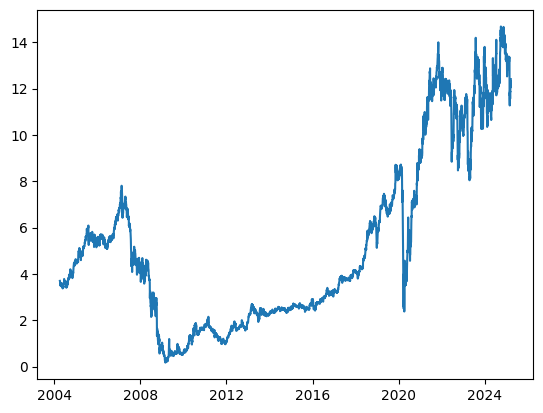

In [ ]:
plt.plot(df['Close'])

 In Facebook's Prophet forecasting library, the DataFrame you pass to the model must have two columns: "ds" and "y". The "ds" (datestamp) column should contain the dates, typically in 'YYYY-MM-DD' format for daily data or datetime format for sub-daily data. The "y" column must contain the numerical values we want to forecast or model.

So if you are working with a DataFrame that has a "Date" column and you want to use it with Prophet, you would need to rename it to "ds"

In [ ]:
print(df.columns)

# Flatten the MultiIndex and convert it into regular columns
df.columns = df.columns.get_level_values(0)  # Get only the first level of the MultiIndex

# Ensure that the date column is in the DataFrame (if it's in the index, move it to a column)
df['Date'] = df.index

# Rename the columns for Prophet: 'Date' to 'ds' and 'Close' (or whichever column you need) to 'y'
df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")

# Check the final structure of the DataFrame
df.head()

MultiIndex([('Close', 'ABR')],
           names=['Price', 'Ticker'])


Price,y,ds
Date,,
2004-04-07,3.699244,2004-04-07
2004-04-08,3.686611,2004-04-08
2004-04-12,3.522401,2004-04-12
2004-04-13,3.520597,2004-04-13
2004-04-14,3.506161,2004-04-14


In [ ]:
# #date is the index so you need to make it a column
# df["Date"] = df.index
# df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")


In [ ]:
df.tail()

Price,y,ds
Date,,
2025-03-10,12.32,2025-03-10
2025-03-11,12.05,2025-03-11
2025-03-12,12.26,2025-03-12
2025-03-13,12.06,2025-03-13
2025-03-14,12.41,2025-03-14


# Make Stock Predictions using Facebook's Prophet

In [ ]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxe7oc48g/tg96ia30.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxe7oc48g/7qoop02f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78946', 'data', 'file=/tmp/tmpxe7oc48g/tg96ia30.json', 'init=/tmp/tmpxe7oc48g/7qoop02f.json', 'output', 'file=/tmp/tmpxe7oc48g/prophet_modelgpmy8h7v/prophet_model-20250316232208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:22:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:22:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:

future = model.make_future_dataframe(periods=151)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5414,2025-08-08,13.205662,12.129419,14.313507
5415,2025-08-09,13.256827,12.201500,14.315368
5416,2025-08-10,13.256629,12.236633,14.330194
5417,2025-08-11,13.207077,12.177202,14.230447
5418,2025-08-12,13.207499,12.116880,14.198033


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)
#use "all" tab. Variations in 1 week, 1 month etc is infinitesimally small


In [ ]:
plot_components_plotly(model, forecast)


/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



# Deploy on Gradio

In [ ]:
!pip install gradio

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━

In [ ]:
import gradio as gr
from datetime import datetime, timedelta
import pandas as pd
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly

def predict_stock(stock_ticker, start_date, end_date, periods):
    df = yf.download(stock_ticker, start=start_date, end=end_date, auto_adjust=True, actions='inline', progress=False)
    df = df.loc[:, ['Close']]
    df["Date"] = df.index
    df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")

    model = Prophet()
    model.fit(df)

    future = model.make_future_dataframe(periods=int(periods))
    forecast = model.predict(future)

    fig = plot_plotly(model, forecast)
    return fig

with gr.Blocks() as demo:
    stock_ticker = gr.Textbox(label="Stock Ticker Symbol")
    start_date = gr.Textbox(label="Start Date (YYYY-MM-DD)", value=(datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d'))
    end_date = gr.Textbox(label="End Date (YYYY-MM-DD)", value=datetime.now().strftime('%Y-%m-%d'))
    periods = gr.Number(label="Number of Days to Predict", value=30)

    outputs = gr.Plot()

    submit_button = gr.Button("Predict")
    submit_button.click(predict_stock, inputs=[stock_ticker, start_date, end_date, periods], outputs=outputs)

demo.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://766d357931085e9c1f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Deploy on Huggingface Spaces - Public Deployment

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)

In [ ]:
!gradio deploy


Need 'write' access token to create a Spaces repo.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Aborted.


#Interview Readiness Questions
1. Choose a new Ticker Symbol.  What is your ticker symbol?
2. What were the future price predictions
3. What were the initial price predictions

# References
[HuggingFace](www.huggingface.co)

[Gradio](https://www.gradio.app/guides/quickstart)


1, https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

2. https://colab.research.google.com/drive/1bb9LykqXq3FV8snTlWrPTHzB3amP9YFH?usp=sharing#scrollTo=iXzl-4Fz-hPV

3. [Sample Streamlit Deployment - Prophet](https://prophet.streamlit.app/?ref=streamlit-io-gallery-favorites)


#Interview Readiness Answers

In [1]:
# Install necessary libraries for Prophet and yfinance (used to fetch stock data)
# Prophet is a library for time series forecasting
!pip install prophet

In [2]:
# yfinance is used to fetch stock data
!pip install yfinance --upgrade --no-cache-dir

In [3]:
# import libraries
import pandas as pd  # Pandas for data manipulation
from prophet import Prophet  # Prophet for time series forecasting

from pandas_datareader import data as web  # pandas_datareader to fetch stock data (not used here but imported)
import datetime  # For date manipulation

import matplotlib.pyplot as plt  # For plotting graphs

import yfinance as yf  # yfinance for downloading stock data

from datetime import timedelta  # For manipulating dates

## Choose a new Ticker Symbol. What is your ticker symbol?
My ticker symbol is "MSFT", which is the ticker symbol of Microsoft Corporation.

In [4]:
# Defining new stock ticker symbol
stock = "MSFT"

In [5]:
# Defining date range
start = "2010-01-01"
today = pd.to_datetime("today")
yesterday = pd.to_datetime("today") - timedelta(days = 1)
end = yesterday

# Download the stock data using yfinance
df = yf.download(stock,
start=start,
end=yesterday,
auto_adjust=True,  # Adjust for splits and dividends
actions='inline',  # Include stock actions (like dividends, stock splits)
progress=True)  # Show progress while downloading


[*********************100%***********************]  1 of 1 completed


In [6]:
# Most historic Stock Prices
df.head()

Price,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,,
2010-01-04,23.254055,0.0,23.366756,22.983571,23.006112,0.0,38409100
2010-01-05,23.261566,0.0,23.366755,23.021137,23.178919,0.0,49749600
2010-01-06,23.118814,0.0,23.351730,22.930979,23.201461,0.0,58182400
2010-01-07,22.878380,0.0,23.066215,22.683031,23.013620,0.0,50559700
2010-01-08,23.036160,0.0,23.201454,22.720596,22.750650,0.0,51197400


In [7]:
# Most recent stock prices
df.tail()

Price,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,,
2025-03-10,380.160004,0.0,386.399994,377.220001,385.839996,0.0,32840100
2025-03-11,380.450012,0.0,386.000000,376.910004,379.000000,0.0,30380200
2025-03-12,383.269989,0.0,385.220001,378.950012,382.950012,0.0,24253600
2025-03-13,378.769989,0.0,385.320007,377.450012,383.160004,0.0,20473000
2025-03-14,388.559998,0.0,390.230011,379.510010,379.779999,0.0,19929300


In [8]:
# Select only the 'Close' prices, which will be used for the time series forecast
df = df.loc[:, ['Close']]

In [9]:
# Most historic Stock closing Prices
df.head()

Price,Close
Ticker,MSFT
Date,
2010-01-04,23.254055
2010-01-05,23.261566
2010-01-06,23.118814
2010-01-07,22.878380
2010-01-08,23.036160


In [10]:
# Most recent stock closing prices
df.tail()

Price,Close
Ticker,MSFT
Date,
2025-03-10,380.160004
2025-03-11,380.450012
2025-03-12,383.269989
2025-03-13,378.769989
2025-03-14,388.559998


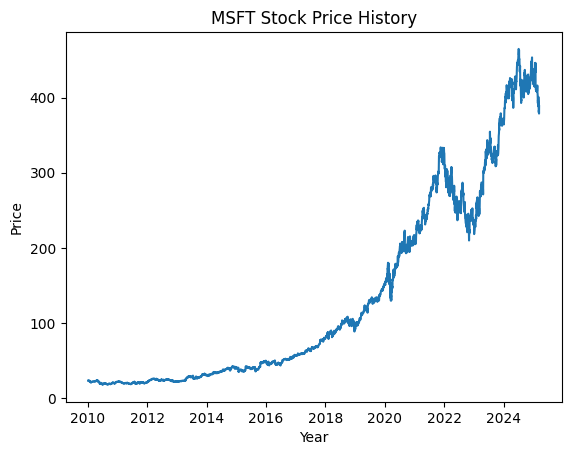

In [11]:
# Plot the stock's closing prices over time
plt.plot(df['Close'])
plt.title('MSFT Stock Price History')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [12]:
print(df.columns)

# Flatten the MultiIndex and convert it into regular columns
df.columns = df.columns.get_level_values(0)  # Get only the first level of the MultiIndex

# Ensure that the date column is in the DataFrame (if it's in the index, move it to a column)
df['Date'] = df.index

# Rename the columns for Prophet: 'Date' to 'ds' and 'Close' (or whichever column you need) to 'y'
df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")

# Check the final structure of the DataFrame
df.head()

MultiIndex([('Close', 'MSFT')],
           names=['Price', 'Ticker'])


Price,y,ds
Date,,
2010-01-04,23.254055,2010-01-04
2010-01-05,23.261566,2010-01-05
2010-01-06,23.118814,2010-01-06
2010-01-07,22.878380,2010-01-07
2010-01-08,23.036160,2010-01-08


In [13]:
df.tail()

Price,y,ds
Date,,
2025-03-10,380.160004,2025-03-10
2025-03-11,380.450012,2025-03-11
2025-03-12,383.269989,2025-03-12
2025-03-13,378.769989,2025-03-13
2025-03-14,388.559998,2025-03-14


In [14]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4acm20dp/66xlaxs6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4acm20dp/5th1wlcg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41359', 'data', 'file=/tmp/tmp4acm20dp/66xlaxs6.json', 'init=/tmp/tmp4acm20dp/5th1wlcg.json', 'output', 'file=/tmp/tmp4acm20dp/prophet_modeleahbxr4n/prophet_model-20250317025122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:51:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:51:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Future Price Predictions of Microsoft Corporation Stock

In [16]:
future = model.make_future_dataframe(periods=151)
forecast = model.predict(future)
print("Future price predictions:")
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

Future price predictions:


,ds,yhat,yhat_lower,yhat_upper
3969,2025-08-08,467.706324,445.233804,490.853165
3970,2025-08-09,469.817641,448.404107,493.530774
3971,2025-08-10,469.972474,446.222397,491.538668
3972,2025-08-11,468.285540,445.610682,490.266309
3973,2025-08-12,468.292931,443.447055,489.547728


The model predicts that Microsoft's stock price will be around 468.45 by August 12, 2025, with an uncertainty range between 446.19 and 491.34.

## Initial Price Predictions of Microsoft Corporation Stock

In [17]:
print("Initial price predictions:")
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

Initial price predictions:


,ds,yhat,yhat_lower,yhat_upper
0,2010-01-04,18.760301,-3.482929,40.998418
1,2010-01-05,18.457163,-3.407592,42.508155
2,2010-01-06,18.424020,-3.971115,42.440384
3,2010-01-07,18.234712,-3.945122,40.310492
4,2010-01-08,18.191884,-2.525960,41.653949


The model predicted that in January 2010, Microsoft's stock price was around  18.15− 18.72, with an uncertainty range between -3.50 and 40.09.

In [18]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [19]:
plot_components_plotly(model, forecast)

/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.

